In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

pd.set_option('display.max_colwidth', -1)

In [3]:
url = 'https://www.azleg.gov/arsDetail/?title=13'
html = requests.get(url).content
soup = BeautifulSoup(html, 'html.parser')

In [4]:
# iterate through ars numbers 
# pack them into a list
ars_number = []
for row in soup.find_all("a", {"class": "stat"}, text=True):
     ars_number.append(row.get_text())


# iterate through ars descriptions 
# pack them into a list
description = []
for row in soup.find_all("li", {"class": "colright"}, text=True):
    description.append(row.get_text())

In [5]:
# create dataframe from lists
ars_numbers_descriptions = pd.DataFrame({'ars_number': ars_number,
                          'ars_description': description})

In [6]:
ars_numbers_descriptions.shape

(943, 2)

In [7]:
ars_numbers_descriptions.head(10)

,ars_number,ars_description
0,13-101,Purposes
1,13-101.01,Additional purposes of the criminal law
2,13-102,Applicability of title
3,13-103,Abolition of common law offenses and affirmative defenses; definition
4,13-104,Rule of construction
5,13-105,Definitions
6,13-106,Death of convicted defendant; dismissal of appellate and postconviction proceedings
7,13-107,Time limitations
8,13-108,Territorial applicability
9,13-109,Place of trial


In [9]:
ars_numbers_descriptions.to_csv('data/ars_numbers_descriptions.csv', index=False)

In [2]:
# import data
df = pd.read_csv('data/ars_numbers_descriptions.csv')

In [5]:
df.tail(30)

,ars_number,ars_description
913,13-4443,Notice of available civil remedies
914,13-4501,Definitions
915,13-4502,Effect of incompetency
916,13-4503,Request for competency examination; jurisdiction over competency hearings; referral
917,13-4504,Dismissal of misdemeanor charges; notice
918,13-4505,Appointment of experts; costs
919,13-4506,Examination for purposes of insanity defense
920,13-4507,Examination of competency to stand trial
921,13-4508,Privilege against self-incrimination; sealed reports
922,13-4509,Expert's report


In [57]:
# extract the 3rd - 5th character
df.loc[:,'ars_number'].apply(lambda x: x[3:5])

0      10
1      10
2      10
3      10
4      10
       ..
938    49
939    49
940    49
941    50
942    50
Name: ars_number, Length: 943, dtype: object

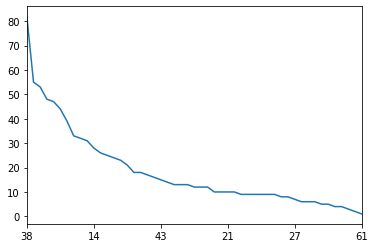

In [36]:
# which subsection has the most codes?
df.loc[:,'ars_number'].apply(lambda x: x[3:5]).value_counts().plot()

Section 38 by quite a bit

In [48]:
df.loc[:,'ars_number'].apply(lambda x: x[3:5])[df.loc[:,'ars_number'].apply(lambda x: x[3:5]) == '38'].index

Int64Index([609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
            622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
            635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647,
            648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660,
            661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673,
            674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686,
            687, 688, 689, 690],
           dtype='int64')

In [53]:
df.iloc[df.loc[:,'ars_number'].apply(lambda x: x[3:5])[df.loc[:,'ars_number'].apply(lambda x: x[3:5]) == '38'].index].tail(40)

,ars_number,ars_description
651,13-3859.01,Local criminal prosecution; continuance of status; time limits tolled
652,13-3859.02,Imprisonment; alternative methods of extradition
653,13-3860,Guilt or innocence of accused; when inquired into
654,13-3861,Governor may recall warrant or issue alias
655,13-3862,Fugitives from this state; duty of governors
656,13-3863,Application for issuance of requisition; by whom made; contents
657,13-3864,Payment of account of agent; method as exclusive; classification
658,13-3865,Exemption from civil process
659,13-3865.01,Written waiver of extradition proceedings; prior waiver
660,13-3866,No right of asylum


In [55]:
# which subsection has the fewest codes?
df.iloc[df.loc[:,'ars_number'].apply(lambda x: x[3:5])[df.loc[:,'ars_number'].apply(lambda x: x[3:5]) == '61'].index].head(40)

,ars_number,ars_description
68,13-610,DNA testing


Apparently there isn't a lot of detail around DNA testing.  Perhaps because it is a more recent technology?